# Importing and Installing Necessary Libraries

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=3f7a06bbfc9b5ac595ac930cae01826059bc6a018a31fc2cfa8166ae25635714
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [ ]:
X=pd.read_csv('/content/drive/MyDrive/IP/data.csv',index_col=0)
onehotlabels=pd.read_csv('/content/drive/MyDrive/IP/labels.csv',index_col=0)

In [ ]:
features=X.columns

# Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, onehotlabels, train_size=0.90, random_state=50)

In [ ]:
X_train=np.array(X_train)

In [ ]:
X_train.shape

(127334, 76)

In [ ]:
y_train.shape

(127334, 4)

In [ ]:
X_train=X_train.reshape(-1, 76, 1)

In [ ]:
X_train.shape

(127334, 76, 1)

# CNN Model and testing

In [ ]:
import keras

In [ ]:
cnn = keras.models.load_model('/content/drive/MyDrive/IP/model_cnn')

In [ ]:
_, accuracy = cnn.evaluate(X_test, y_test, batch_size=32, verbose=1)

443/443 [==============================] - 4s 8ms/step - loss: 0.2894 - accuracy: 0.8967


# XAI Techniques

# LIME

In [ ]:
xm=np.array(X)

In [ ]:
xm[0,0]

229.0

In [ ]:
features

Index(['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag C

In [ ]:
# Importing the module for LimeTabularExplainer
import lime.lime_tabular
 
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(xm,
                                                        feature_names=features,
                                                        class_names=['Non-Tor', 'NonVPN', 'Tor', 'VPN'],
                                                        #categorical_features=categorical_features,
                                                        #categorical_names=categorical_names,
                                                        discretizer='decile',
                                                        kernel_width=5,
                                                        discretize_continuous=True,
                                                        verbose=True, mode='regression')




In [ ]:
xm[10]

array([9.05136410e+07, 3.20000000e+01, 4.10000000e+01, 3.36900000e+03,
       2.17250000e+04, 2.61000000e+02, 0.00000000e+00, 1.05281250e+02,
       1.10554098e+02, 1.46000000e+03, 0.00000000e+00, 5.29878049e+02,
       6.18946209e+02, 2.77239980e+02, 8.06508270e-01, 1.25713390e+06,
       7.45170733e+06, 4.50556480e+07, 5.00000000e+00, 9.05131690e+07,
       2.91977965e+06, 1.12428552e+07, 4.50560490e+07, 2.76000000e+02,
       9.05133500e+07, 2.26283375e+06, 9.93766964e+06, 4.50561200e+07,
       5.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.40000000e+02, 8.20000000e+02, 3.53537872e-01,
       4.52970398e-01, 0.00000000e+00, 1.46000000e+03, 3.42635135e+02,
       5.09492968e+02, 2.59583084e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.40000000e+01, 7.30000000e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.47328767e+02,
       1.05281250e+02, 5.29878049e+02, 0.00000000e+00, 0.00000000e+00,
      

# Explanation by LIME: CNN

In [ ]:
# Index corresponding to the test vector
i = 10
 
# Number denoting the top features
k = 20
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance( xm[i], cnn.predict, num_features=k)
 
# Finally visualizing the explanations
exp_lime.show_in_notebook()

157/157 [==============================] - 2s 9ms/step
Intercept 0.41982943239048653
Prediction_local [0.21271436]
Right: 0.855596


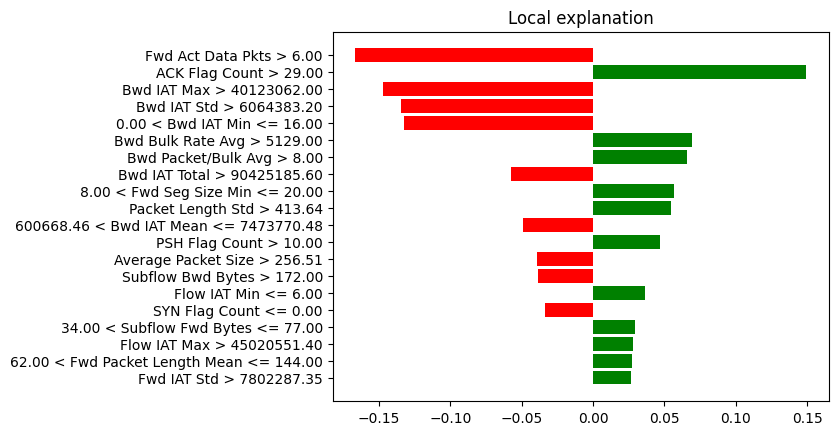

In [ ]:
%matplotlib inline
# Positive and Negative top 20 feature importance score plotted
fig = exp_lime.as_pyplot_figure(label=1)

In [ ]:
# Empirical Values of feature importance/ Contribution
pd.DataFrame(exp_lime.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0                   Fwd Act Data Pkts > 6.00     -0.166620
1                     ACK Flag Count > 29.00      0.149294
2                  Bwd IAT Max > 40123062.00     -0.146933
3                   Bwd IAT Std > 6064383.20     -0.134457
4                0.00 < Bwd IAT Min <= 16.00     -0.132276
5                Bwd Bulk Rate Avg > 5129.00      0.069114
6                 Bwd Packet/Bulk Avg > 8.00      0.065833
7                Bwd IAT Total > 90425185.60     -0.057606
8           8.00 < Fwd Seg Size Min <= 20.00      0.056592
9                 Packet Length Std > 413.64      0.054772
10    600668.46 < Bwd IAT Mean <= 7473770.48     -0.048803
11                    PSH Flag Count > 10.00      0.046687
12              Average Packet Size > 256.51     -0.039204
13                Subflow Bwd Bytes > 172.00     -0.038481
14                      Flow IAT Min <= 6.00      0.036423
15                    SYN Flag Count <= 0.00     -0.033660
16        34.00 < Subflow Fwd Bytes <= 77.00      0.029718
17                Flow IAT Max > 45020551.40      0.028212
18  62.00 < Fwd Packet Length Mean <= 144.00      0.027405
19                  Fwd IAT Std > 7802287.35      0.026877

# Feature Importance Validation: CNN

In [ ]:
feat_imp_cnn=pd.DataFrame(exp_lime.as_list(),columns=['Feature','Contribution'])

In [ ]:
import re
# These are simple opereations done to extract the important feature names

element_cnn=list(feat_imp_cnn.iloc[:,0])
# List of elements
#elements = ['apple', '123', 'banana!', 'cherry$']

# Regular expression to match alphabets only
pattern = re.compile('[^a-zA-Z]')

# Filter out elements with non-alphabetic characters
filtered_elements_cnn = [pattern.sub('', element) for element in element_cnn]

print(filtered_elements_cnn)  # Output: ['apple', '', 'banana', 'cherry']

['FwdActDataPkts', 'BwdIATStd', 'ACKFlagCount', 'BwdIATMax', 'BwdIATMin', 'BwdBulkRateAvg', 'BwdPacketBulkAvg', 'PSHFlagCount', 'FwdPacketLengthMean', 'BwdHeaderLength', 'FwdSegSizeMin', 'SubflowBwdBytes', 'IdleMean', 'BwdIATTotal', 'TotalLengthofBwdPacket', 'SYNFlagCount', 'FwdSegmentSizeAvg', 'PacketLengthMean', 'BwdPacketLengthStd', 'TotalBwdpackets']


In [ ]:
X_ft_cnn=X[['Fwd Act Data Pkts', 'Bwd IAT Std', 'ACK Flag Count', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd Bulk Rate Avg', 
             'Bwd Packet/Bulk Avg', 'PSH Flag Count', 'Fwd Packet Length Mean', 'Bwd Header Length', 'Fwd Seg Size Min', 
             'Subflow Bwd Bytes', 'Idle Mean', 'Bwd IAT Total', 'Total Length of Bwd Packet', 
             'SYN Flag Count', 'Fwd Segment Size Avg', 'Packet Length Mean', 'Bwd Packet Length Std', 'Total Bwd packets' ]]

In [ ]:
X_cnn_list=['Fwd Act Data Pkts', 'Bwd IAT Std', 'ACK Flag Count', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd Bulk Rate Avg', 
             'Bwd Packet/Bulk Avg', 'PSH Flag Count', 'Fwd Packet Length Mean', 'Bwd Header Length', 'Fwd Seg Size Min', 
             'Subflow Bwd Bytes', 'Idle Mean', 'Bwd IAT Total', 'Total Length of Bwd Packet', 
             'SYN Flag Count', 'Fwd Segment Size Avg', 'Packet Length Mean', 'Bwd Packet Length Std', 'Total Bwd packets' ]

## Train test split for CNN-LIME

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( X_ft_cnn, onehotlabels, train_size=0.90, random_state=50)

## Random forest to Validate feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cnn = RandomForestClassifier()
rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te_cnn, y_pred_rf_cnn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9338
           1       0.89      0.84      0.87      2371
           2       0.94      0.84      0.88       146
           3       0.87      0.89      0.88      2294

   micro avg       0.95      0.95      0.95     14149
   macro avg       0.92      0.89      0.91     14149
weighted avg       0.95      0.95      0.95     14149
 samples avg       0.95      0.95      0.95     14149



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM Model and Testing

In [ ]:
lstm = keras.models.load_model('/content/drive/MyDrive/IP/model_lstm')

In [ ]:
_, accuracy = lstm.evaluate(X_test, y_test, batch_size=32, verbose=1)

443/443 [==============================] - 15s 30ms/step - loss: 0.2377 - acc: 0.9114


# Explanation by LIME: LSTM

In [ ]:
# Index corresponding to the test vector
i = 10
 
# Number denoting the top features
k = 20
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k

exp_lime1 = explainer_lime.explain_instance( xm[i], lstm.predict, num_features=k)
 
# Finally visualizing the explanations
exp_lime1.show_in_notebook()

157/157 [==============================] - 6s 30ms/step
Intercept 0.5631147531616143
Prediction_local [1.12511402]
Right: 0.8945384


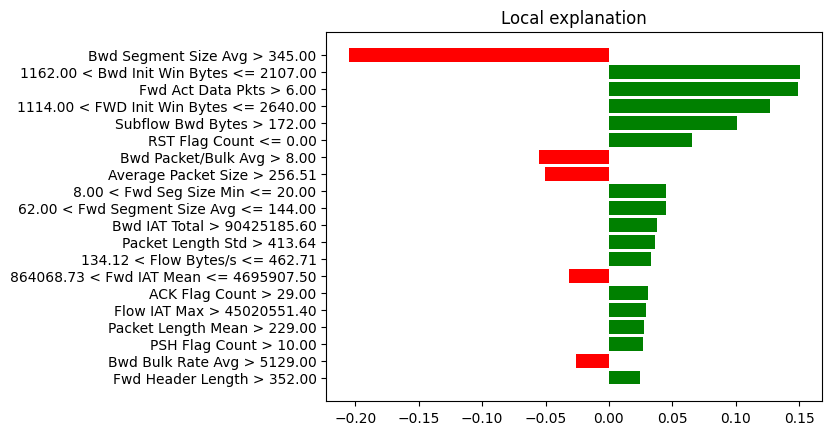

In [ ]:
%matplotlib inline
# Positive and Negative top 20 feature importance score plotted
fig1 = exp_lime1.as_pyplot_figure(label=1)

In [ ]:
# Empirical Values of feature importance/ Contribution
pd.DataFrame(exp_lime1.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0             Bwd Segment Size Avg > 345.00     -0.205182
1   1162.00 < Bwd Init Win Bytes <= 2107.00      0.150436
2                  Fwd Act Data Pkts > 6.00      0.149187
3   1114.00 < FWD Init Win Bytes <= 2640.00      0.127420
4                Subflow Bwd Bytes > 172.00      0.101054
5                    RST Flag Count <= 0.00      0.065811
6                Bwd Packet/Bulk Avg > 8.00     -0.055352
7              Average Packet Size > 256.51     -0.050380
8          8.00 < Fwd Seg Size Min <= 20.00      0.045282
9    62.00 < Fwd Segment Size Avg <= 144.00      0.044767
10              Bwd IAT Total > 90425185.60      0.037741
11               Packet Length Std > 413.64      0.036631
12          134.12 < Flow Bytes/s <= 462.71      0.032979
13   864068.73 < Fwd IAT Mean <= 4695907.50     -0.031504
14                   ACK Flag Count > 29.00      0.030760
15               Flow IAT Max > 45020551.40      0.029144
16              Packet Length Mean > 229.00      0.027402
17                   PSH Flag Count > 10.00      0.027144
18              Bwd Bulk Rate Avg > 5129.00     -0.026058
19               Fwd Header Length > 352.00      0.024718

# Feature Importance Validation: LSTM

In [ ]:
feat_imp_lstm=pd.DataFrame(exp_lime1.as_list(),columns=['Feature','Contribution'])

In [ ]:
import re

elements=list(feat_imp_lstm.iloc[:,0])
# List of elements
#elements = ['apple', '123', 'banana!', 'cherry$']

# Regular expression to match alphabets only
pattern = re.compile('[^a-zA-Z]')

# Filter out elements with non-alphabetic characters
filtered_elements = [pattern.sub('', element) for element in elements]

print(filtered_elements)  # Output: ['apple', '', 'banana', 'cherry']


['BwdSegmentSizeAvg', 'FwdActDataPkts', 'FWDInitWinBytes', 'SubflowBwdBytes', 'BwdInitWinBytes', 'BwdPacketBulkAvg', 'AveragePacketSize', 'PacketLengthVariance', 'IdleMin', 'FwdSegSizeMin', 'SubflowFwdBytes', 'FwdSegmentSizeAvg', 'PSHFlagCount', 'BwdIATMin', 'IdleMean', 'BwdPacketLengthMean', 'PacketLengthMean', 'FwdPacketss', 'FlowBytess', 'BwdPacketLengthStd']


In [ ]:
X_ft_lstm=X[['Bwd Segment Size Avg', 'Fwd Act Data Pkts', 'FWD Init Win Bytes', 'Subflow Bwd Bytes', 'Bwd Init Win Bytes', 
 'Bwd Packet/Bulk Avg', 'Average Packet Size', 'Packet Length Variance', 'Idle Min', 'Fwd Seg Size Min', 'Subflow Fwd Bytes',
 'Fwd Segment Size Avg', 'PSH Flag Count', 'Bwd IAT Min', 'Idle Mean', 'Bwd Packet Length Mean', 'Packet Length Mean', 
 'Fwd Packets/s', 'Flow Bytes/s', 'Bwd Packet Length Std']]


In [ ]:
X_lstm_list=['Bwd Segment Size Avg', 'Fwd Act Data Pkts', 'FWD Init Win Bytes', 'Subflow Bwd Bytes', 'Bwd Init Win Bytes', 
 'Bwd Packet/Bulk Avg', 'Average Packet Size', 'Packet Length Variance', 'Idle Min', 'Fwd Seg Size Min', 'Subflow Fwd Bytes',
 'Fwd Segment Size Avg', 'PSH Flag Count', 'Bwd IAT Min', 'Idle Mean', 'Bwd Packet Length Mean', 'Packet Length Mean', 
 'Fwd Packets/s', 'Flow Bytes/s', 'Bwd Packet Length Std']

## Train test split for LSTM-LIME

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( X_ft_lstm, onehotlabels, train_size=0.90, random_state=50)

## Random Forest to Validate Feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

RandomForestClassifier()

In [ ]:
# Metrics to compare the performance
from sklearn.metrics import classification_report
print(classification_report(y_te_lstm, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9338
           1       0.95      0.95      0.95      2371
           2       0.98      0.93      0.95       146
           3       0.95      0.95      0.95      2294

   micro avg       0.98      0.98      0.98     14149
   macro avg       0.97      0.96      0.96     14149
weighted avg       0.98      0.98      0.98     14149
 samples avg       0.98      0.98      0.98     14149



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing Feature Importance Across Models

In [ ]:
feat_imp_cnn['Contribution']

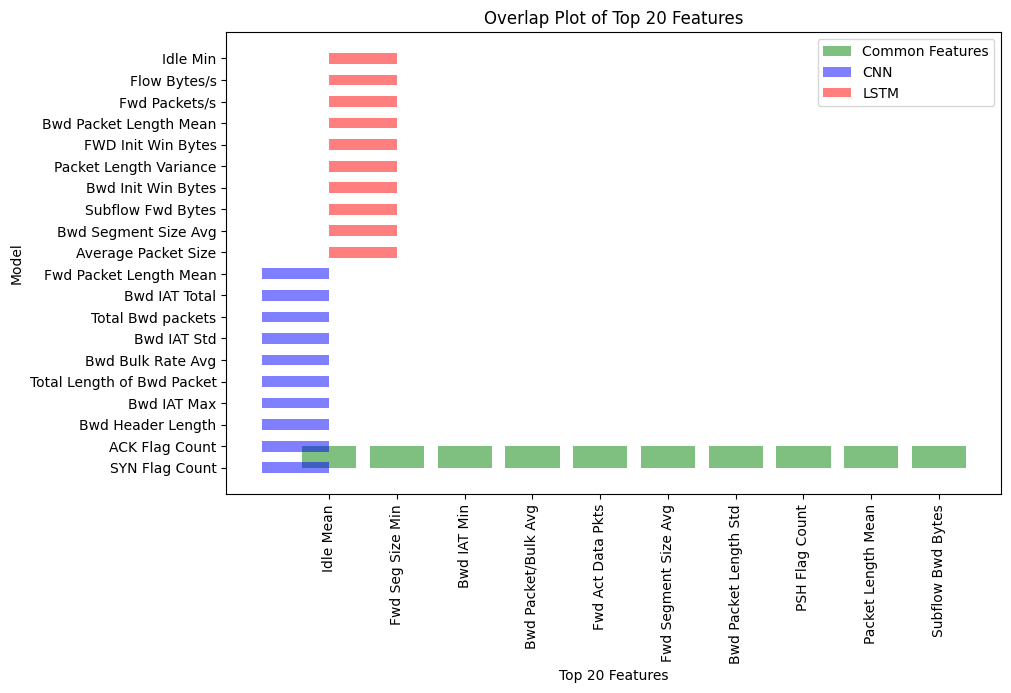

In [ ]:
import matplotlib.pyplot as plt

# define the two lists of top 20 features
#top_20_features_model_1 = ['feature_1', 'feature_2', ..., 'feature_20']
#top_20_features_model_2 = ['feature_1', 'feature_3', ..., 'feature_19']

# create a set of the top 20 features from each model
set_model_1 = set(X_ft_cnn)
set_model_2 = set(X_ft_lstm)

# compute the common top 20 features between the two models
common_features = list(set_model_1.intersection(set_model_2))

# compute the unique top 20 features for each model
unique_features_model_1 = list(set_model_1 - set_model_2)
unique_features_model_2 = list(set_model_2 - set_model_1)

# create the overlap plot
fig, ax = plt.subplots(figsize=(10, 6))

# plot the common features
ax.bar(common_features, height=1, color='green', alpha=0.5, label='Common Features')

# plot the unique features for model 1
ax.barh(unique_features_model_1, width=-1, height=0.5, color='blue', alpha=0.5, label='CNN')

# plot the unique features for model 2
ax.barh(unique_features_model_2, width=1, height=0.5, color='red', alpha=0.5, label='LSTM')

# set the x and y axis labels and title
ax.set_xlabel('Top 20 Features')
ax.set_ylabel('Model')
ax.set_title('Overlap Plot of Top 20 Features')

plt.xticks(rotation=90)

# add a legend
ax.legend()

# show the plot
plt.show()

# Scatter Plot

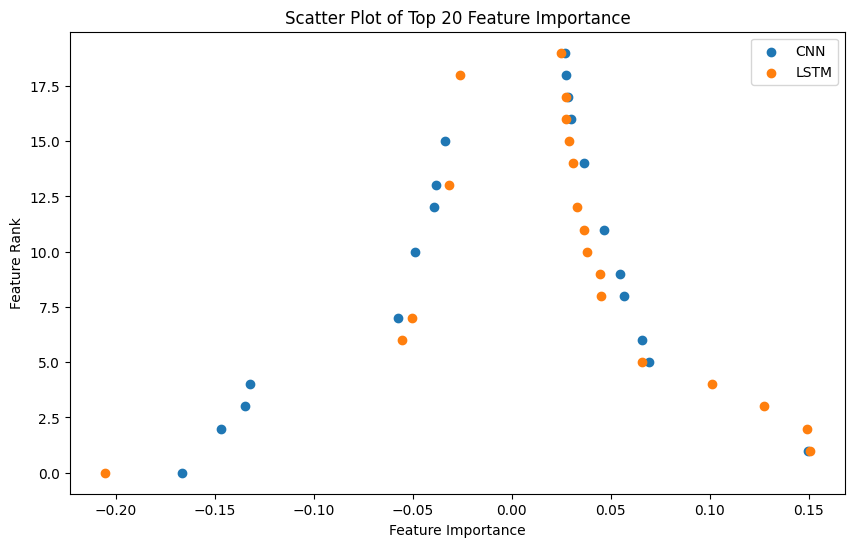

In [ ]:
# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = X_cnn_list #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feat_imp_cnn['Contribution'] #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = X_lstm_list #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feat_imp_lstm['Contribution'] #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'CNN': importance_model_1, 'LSTM': importance_model_2}

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for model, importance in importance_dict.items():
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # plot the feature importance values as a scatter plot
    ax.scatter(values, range(20), label=model)

# set the x and y axis labels and title
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Rank')
ax.set_title('Scatter Plot of Top 20 Feature Importance')

# add a legend
ax.legend()

# show the plot
plt.show()

# Bar Plot

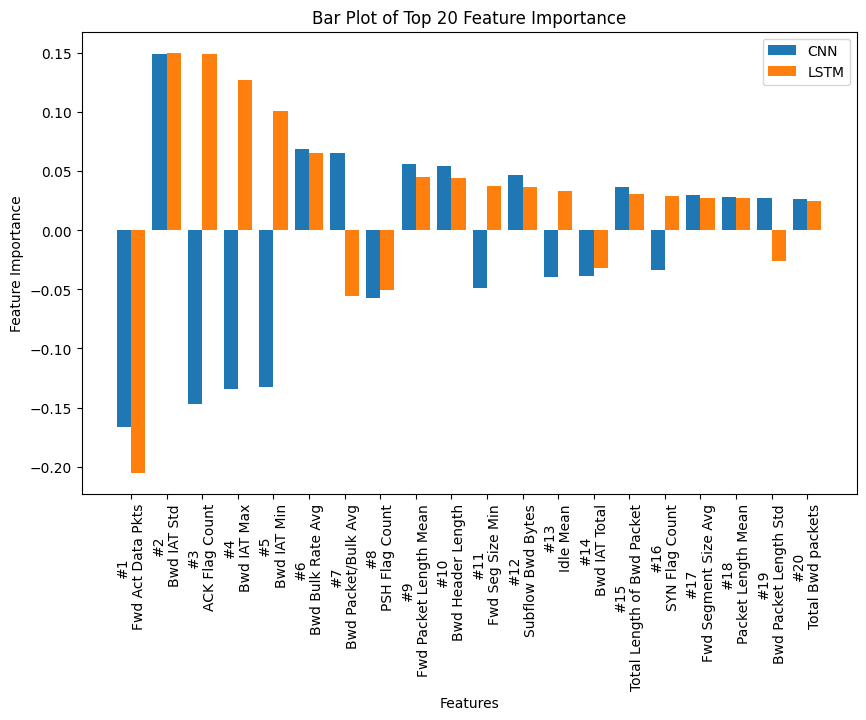

In [ ]:
import numpy as np

# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = X_cnn_list #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feat_imp_cnn['Contribution'] #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = X_lstm_list #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feat_imp_lstm['Contribution'] #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'CNN': importance_model_1, 'LSTM': importance_model_2}

# set the width of the bars
bar_width = 0.4

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for i, (model, importance) in enumerate(importance_dict.items()):
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # calculate the x-axis positions for the bars
    x_pos = np.arange(len(values)) + i * bar_width
    # plot the feature importance values as a bar plot
    ax.bar(x_pos, values, bar_width, label=model)

# set the x and y axis labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Bar Plot of Top 20 Feature Importance')

# set the x-axis tick positions and labels
xtick_pos = np.arange(20)
xtick_labels = [f'#{i+1}\n{f}' for i, f in enumerate(top_20_features_model_1)]
ax.set_xticks(xtick_pos + bar_width / 2)
ax.set_xticklabels(xtick_labels, rotation='vertical')

# add a legend
ax.legend()

# show the plot
plt.show()


# Box Plot

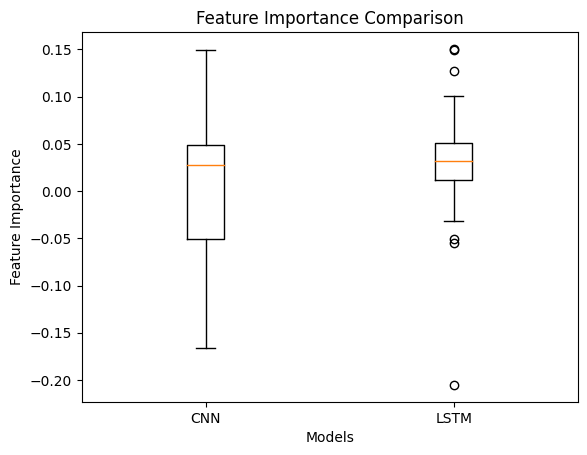

In [ ]:
# sample data for two models
model1 = feat_imp_cnn['Contribution'] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model2 = feat_imp_lstm['Contribution'] # [1, 2, 2, 3, 3, 3, 4, 5, 6, 10]

# create a list of the two models' data
data = [model1, model2]

# set the labels for the x-axis
labels = ['CNN', 'LSTM']

# create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# add a title and axis labels
ax.set_title('Feature Importance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Feature Importance')

# display the plot
plt.show()
